In [32]:
!pip install nltk
import nltk; nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from wordcloud import WordCloud

You should consider upgrading via the '/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cbeams/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


You should consider upgrading via the '/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/bin/python -m pip install --upgrade pip' command.


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [5]:
# Import Dataset
df = pd.read_json('../raw_data/all_data_df_stripped.json')
df.head()

full_transcript       artist  \
0  [rock music playing]\n\n[indistinct chatter]\n...  Adam Devine   
1    strong language. CHEERING Yes, yes, yes! How...    Adam Hess   
2   Ladies and gentlemen, please welcome your hos...   Adam Hills   
3    some strong language and adult humour Ladies...   Adam Hills   
4  ? CHEERING Hello, Apollo. I am going to start ...   Adam Hills   

                                show_name    year                source  \
0                  Best Time Of Our Lives  2019.0  Scraps from the Loft   
1                       Live from the BBC  2016.0                   BBC   
2   Live at the Apollo Series 9 Episode 4  2013.0                   BBC   
3  Live at the Apollo Series 12 Episode 4  2016.0                   BBC   
4   Live at the Apollo Series 5 Episode 5  2009.0                   BBC   

   artist_birthday  artist_gender  age_then  \
0           1983.0              2      36.0   
1           1990.0              2      26.0   
2           1970.0              2      43.0   
3           1970.0              2      46.0   
4           1970.0              2      39.0   

                               full_transcript_clean  
0  man guy much seat guy jacked fully juiced man ...  
1  yes yes yes lovely apologise state voice go co...  
2  tonight london london live amazing act present...  
3  tonight hair lost bet british paralympic team ...  
4  start saying something probably never heard co...

In [73]:
lady_df = df[df['artist_gender']==1]

In [74]:
lady_df.head()

full_transcript         artist  \
7   ! APPLAUSE AND CHEERING Hello! Hello, The Apol...    Aisling Bea   
15  Ladies and gentlemen, please welcome to the st...       Ali Wong   
16  Ladies and gentlemen, please welcome to the st...       Ali Wong   
18  Now, y’all keep asking me, “Amanda, who is thi...  Amanda Seales   
19  My name is Amy, and it’s my show! ♪ Man ♪ ♪ Uh...    Amy Schumer   

                                 show_name    year                source  \
7   Live at the Apollo Series 10 Episode 3  2014.0                   BBC   
15                              Baby Cobra  2016.0  Scraps from the Loft   
16                         Hard Knock Wife  2018.0  Scraps from the Loft   
18                            I Be Knowin’  2019.0  Scraps from the Loft   
19                      Live At The Apollo  2015.0  Scraps from the Loft   

    artist_birthday  artist_gender  age_then  \
7            1984.0              1      30.0   
15           1982.0              1      34.0   
16           1982.0              1      36.0   
18           1981.0              1      38.0   
19           1981.0              1      34.0   

                                full_transcript_clean  
7   delighted delighted actually recently stop hon...  
15  coming shit pee ten minute much coming excitin...  
16  goodness heard rumor asian city congregated th...  
18  keep asking amanda special keep telling sister...  
19  amy show hit show loved movie trainwreck harle...

In [75]:
# Convert to list
data = lady_df.full_transcript_clean.values.tolist()

pprint(data[:1])

['delighted delighted actually recently stop honestly talk insist though '
 'delighted today rushed recently terrible abdominal problem hideous pain '
 'tummy around side rushed hour thought erm anyone ever read magazine teenager '
 'mean especially girl thought surprise baby way always story magazine normal '
 'nothing different regular go toilet looked toilet baby toilet surprise baby '
 'always sort thought erm happy actually bringing sexy back gut infection gut '
 'infection worst whole situation doctor handsome doctor handsome struck sort '
 'mashed potato head feel instead man handsome seems problem doctor problem '
 'cute ahhahahaha chase chase thought surprise baby else waiting poo mean find '
 'drink quite terrible way might notice talk quite fast honest slow much sort '
 'jump vengabus enthusiasm beep horn reason talk quite fast brought '
 'countryside deepest darkest countryside noone mile mile around giant expanse '
 'land noone talk lonely noone speak day backwards existen

/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__)

/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__)

/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__)

/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__)

In [76]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['delighted', 'delighted', 'actually', 'recently', 'stop', 'honestly', 'talk', 'insist', 'though', 'delighted', 'today', 'rushed', 'recently', 'terrible', 'abdominal', 'problem', 'hideous', 'pain', 'tummy', 'around', 'side', 'rushed', 'hour', 'thought', 'erm', 'anyone', 'ever', 'read', 'magazine', 'teenager', 'mean', 'especially', 'girl', 'thought', 'surprise', 'baby', 'way', 'always', 'story', 'magazine', 'normal', 'nothing', 'different', 'regular', 'go', 'toilet', 'looked', 'toilet', 'baby', 'toilet', 'surprise', 'baby', 'always', 'sort', 'thought', 'erm', 'happy', 'actually', 'bringing', 'sexy', 'back', 'gut', 'infection', 'gut', 'infection', 'worst', 'whole', 'situation', 'doctor', 'handsome', 'doctor', 'handsome', 'struck', 'sort', 'mashed', 'potato', 'head', 'feel', 'instead', 'man', 'handsome', 'seems', 'problem', 'doctor', 'problem', 'cute', 'ahhahahaha', 'chase', 'chase', 'thought', 'surprise', 'baby', 'else', 'waiting', 'poo', 'mean', 'find', 'drink', 'quite', 'terrible', 'w

In [77]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=5)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['delighted', 'delighted', 'actually', 'recently', 'stop', 'honestly', 'talk', 'insist', 'though', 'delighted', 'today', 'rushed', 'recently', 'terrible', 'abdominal', 'problem', 'hideous', 'pain', 'tummy', 'around', 'side', 'rushed', 'hour', 'thought', 'erm', 'anyone_ever', 'read', 'magazine', 'teenager', 'mean', 'especially', 'girl', 'thought', 'surprise', 'baby', 'way', 'always', 'story', 'magazine', 'normal', 'nothing', 'different', 'regular', 'go', 'toilet', 'looked', 'toilet', 'baby', 'toilet', 'surprise', 'baby', 'always', 'sort', 'thought', 'erm', 'happy', 'actually', 'bringing', 'sexy', 'back', 'gut', 'infection', 'gut', 'infection', 'worst', 'whole', 'situation', 'doctor', 'handsome', 'doctor', 'handsome', 'struck', 'sort', 'mashed_potato', 'head', 'feel', 'instead', 'man', 'handsome', 'seems', 'problem', 'doctor', 'problem', 'cute', 'ahhahahaha', 'chase', 'chase', 'thought', 'surprise', 'baby', 'else', 'waiting', 'poo', 'mean', 'find', 'drink', 'quite', 'terrible', 'way', 'm

In [78]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [79]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['delight', 'delighted', 'actually', 'recently', 'stop', 'honestly', 'talk', 'insist', 'delighted', 'today', 'rush', 'recently', 'terrible', 'abdominal', 'problem', 'hideous', 'pain', 'tummy', 'side', 'rush', 'hour', 'thought', 'erm', 'read', 'magazine', 'teenager', 'mean', 'especially', 'girl', 'think', 'surprise', 'baby', 'way', 'always', 'story', 'magazine', 'normal', 'different', 'regular', 'go', 'toilet', 'look', 'toilet', 'baby', 'toilet', 'surprise', 'baby', 'always', 'sort', 'think', 'happy', 'actually', 'bring', 'sexy', 'back', 'gut', 'infection', 'gut', 'infection', 'bad', 'whole', 'situation', 'doctor', 'handsome', 'doctor', 'strike', 'sort', 'head', 'feel', 'instead', 'man', 'handsome', 'seem', 'problem', 'doctor', 'problem', 'chase', 'think', 'surprise', 'baby', 'else', 'wait', 'poo', 'mean', 'find', 'drink', 'quite', 'terrible', 'way', 'notice', 'talk', 'quite', 'fast', 'honest', 'slow', 'much', 'sort', 'jump', 'vengabus', 'enthusiasm', 'beep', 'horn', 'reason', 'talk', 

In [80]:
def remove_stopw(text, word_list):
    for i in range(len(text)):
        text[i] = [w for w in text[i] if not w in word_list]
    return text

In [81]:
### additional words to remove from the scripts
words_to_remove = ['thank', 'cheering', 'recorded', 'applause', 'laughter', 'laughing', 'murmuring', 'chatter',
                       'aired', 'filmed', 'ladies', 'gentlemen', 'welcome', 'stage', 'transcript', 'netflix',
                  'apollo', 'like', 'goodnight', 'mutter', 'noo', 'nuh', 'oof', 'maan', 'cause', 'okay', 
                   'hey', 'also', 'someone', 'somebody', 'everybody', 'also', 'part' , 'sometimes', 'maybe', 
                   'three', 'second', 'everything', 'minute', 'name', 'kind', 'point', 'yeah', 'hello', 'one', 
                   'two', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'whine', 'hnn', 'malla', 'letta', 
                   'namoo', 'getta', 'nama', 'mana', 'chk','manoo', 'hadda', 'ama', 'carlin',
                  'go', 'know', 'host', 'goodnight', 'get', 'gon', 'think', 'say', 'right', 'look',
                  'thing', 'make', 'know', 'want', 'going', 'would', 'could', 'gentlemen', 'let', 'please',
                   'hbo', 'special' 'yes', 'take', 'say', 'got', 'come', 'see', 'really', 'tell',
                   'well', 'give', 'said', 'people', 'mean', 'even', 'never', 'way', 'happen', 'put', 'much',
                  'lot', 'ever', 'still', 'live', 'quite', 'sort', 'actually', 'use', 'tonight', 'find', 'always',
                  'time', 'good', 'back', 'show', 'little', 'big', 'day', 'talk', 'start', 'need', 'bad', 'first', 'great',
                  'try', 'year', 'word', 'turn', 'bring', 'feel', 'bit', 'ck', 'cke', 'gger', 'ckin', 'groan', 'groan_low', 'groan_high',
                  'high_groan', 'low_groan']
                    
                    # 'know'? 'go'? 'fuck'?
    
                    # haven't left 'i'm' etc. as those should be cleaned up
                    # by a mixture of stopwords, punctuation removeal, lemmatizing and minimum length

remove_stopw(data_lemmatized, stopwords.words('english'))
remove_stopw(data_lemmatized, words_to_remove)

[['delight',
  'delighted',
  'recently',
  'stop',
  'honestly',
  'insist',
  'delighted',
  'today',
  'rush',
  'recently',
  'terrible',
  'abdominal',
  'problem',
  'hideous',
  'pain',
  'tummy',
  'side',
  'rush',
  'hour',
  'thought',
  'erm',
  'read',
  'magazine',
  'teenager',
  'especially',
  'girl',
  'surprise',
  'baby',
  'story',
  'magazine',
  'normal',
  'different',
  'regular',
  'toilet',
  'toilet',
  'baby',
  'toilet',
  'surprise',
  'baby',
  'happy',
  'sexy',
  'gut',
  'infection',
  'gut',
  'infection',
  'whole',
  'situation',
  'doctor',
  'handsome',
  'doctor',
  'strike',
  'head',
  'instead',
  'man',
  'handsome',
  'seem',
  'problem',
  'doctor',
  'problem',
  'chase',
  'surprise',
  'baby',
  'else',
  'wait',
  'poo',
  'drink',
  'terrible',
  'notice',
  'fast',
  'honest',
  'slow',
  'jump',
  'vengabus',
  'enthusiasm',
  'beep',
  'horn',
  'reason',
  'fast',
  'countryside',
  'deep',
  'dark',
  'countryside',
  'noone',
  

In [82]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 7), (19, 1), (20, 6), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 3), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 4), (52, 3), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 3), (70, 1), (71, 2), (72, 4), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 3), (83, 1), (84, 1), (85, 1), (86, 5), (87, 1), (88, 2), (89, 1), (90, 3), (91, 9), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 7), (100, 3), (101, 1), (102, 2), (103, 1), (104, 1), (105, 2), (106, 3), (107, 2), (108, 1), (109, 1), (110, 1)

In [98]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=31,
                                            random_state=100,
                                            update_every=5,
                                            chunksize=15,
                                            passes=10,
                                            alpha=0.4,
                                            eta=0.5,
                                            per_word_topics=True)

In [99]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(22,
  '0.000*"counsellor" + 0.000*"broody" + 0.000*"ravish" + 0.000*"iraqi" + '
  '0.000*"woman" + 0.000*"traditional" + 0.000*"com" + 0.000*"nanny" + '
  '0.000*"guy" + 0.000*"man"'),
 (12,
  '0.000*"guy" + 0.000*"love" + 0.000*"man" + 0.000*"woman" + 0.000*"girl" + '
  '0.000*"call" + 0.000*"kid" + 0.000*"shit" + 0.000*"work" + 0.000*"friend"'),
 (30,
  '0.000*"guy" + 0.000*"woman" + 0.000*"man" + 0.000*"love" + 0.000*"girl" + '
  '0.000*"work" + 0.000*"call" + 0.000*"fuck" + 0.000*"life" + 0.000*"shit"'),
 (1,
  '0.000*"woman" + 0.000*"guy" + 0.000*"man" + 0.000*"love" + 0.000*"call" + '
  '0.000*"fuck" + 0.000*"girl" + 0.000*"shit" + 0.000*"baby" + '
  '0.000*"fucking"'),
 (15,
  '0.001*"wedding" + 0.001*"bridget" + 0.001*"scooter" + 0.001*"fantasy" + '
  '0.001*"chef" + 0.001*"kiss" + 0.001*"bride" + 0.001*"party" + '
  '0.001*"best_friend" + 0.001*"mom"'),
 (6,
  '0.003*"joke" + 0.003*"story" + 0.002*"comedy" + 0.002*"laugh" + '
  '0.002*"german" + 0.002*"mum" + 0.002*"speak" +

In [100]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.425807580978978

Coherence Score:  0.3305750226558711


In [101]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
27    -0.278712  0.167534       1        1  49.996716
10    -0.299375 -0.130036       2        1  27.444432
6      0.042822 -0.057167       3        1  11.490318
15     0.035741 -0.018865       4        1   4.665252
14     0.009237 -0.007614       5        1   1.923073
11     0.028248  0.007541       6        1   1.703826
23     0.022160  0.008389       7        1   1.032734
26     0.020016  0.000297       8        1   0.363632
24     0.020582  0.000647       9        1   0.332590
28     0.017978  0.003504      10        1   0.328267
2      0.018384  0.001433      11        1   0.077086
5      0.018020  0.001376      12        1   0.064447
0      0.018173  0.001293      13        1   0.030434
22     0.018144  0.001228      14        1   0.030403
7      0.018137  0.001212      15        1   0.030401
13     0.018142  0.001225      16        1   0.030400
19     0.018165  0.001221      17        1   0.030400
4      0.018140  0.001166      18        1   0.030400
30     0.018159  0.001213      19        1   0.030400
16     0.018163  0.001249      20        1   0.030400
9      0.018168  0.001239      21        1   0.030399
1      0.018137  0.001198      22        1   0.030399
25     0.018150  0.001177      23        1   0.030399
17     0.018147  0.001168      24        1   0.030399
3      0.018143  0.001160      25        1   0.030399
18     0.018157  0.001181      26        1   0.030399
12     0.018155  0.001245      27        1   0.030399
20     0.018149  0.001172      28        1   0.030399
29     0.018143  0.001213      29        1   0.030399
8      0.018149  0.001177      30        1   0.030399
21     0.018179  0.001225      31        1   0.030398, topic_info=       Term         Freq        Total Category  logprob  loglift
658     guy  1687.000000  1687.000000  Default  30.0000  30.0000
307   woman  1200.000000  1200.000000  Default  29.0000  29.0000
113    girl   616.000000   616.000000  Default  28.0000  28.0000
487   crazy   216.000000   216.000000  Default  27.0000  27.0000
161     man   821.000000   821.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
149   leave     0.002711   203.639433  Topic31  -9.4509  -3.1281
413     buy     0.002711   186.988967  Topic31  -9.4509  -3.0428
184     old     0.002711   196.223685  Topic31  -9.4511  -3.0912
191  person     0.002710   201.697806  Topic31  -9.4513  -3.1190
155    long     0.002710   176.277784  Topic31  -9.4514  -2.9843

[2725 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
6585       3  0.763622      abroad
6585       4  0.109089      abroad
3          1  0.238242  absolutely
3          2  0.285891  absolutely
3          3  0.452660  absolutely
...      ...       ...         ...
10894      1  0.445239     yiddish
10894      3  0.445239     yiddish
5974       1  0.460991        yoho
5974       3  0.460991        yoho
10984      3  0.446418    youtuber

[1641 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 11, 7, 16, 15, 12, 24, 27, 25, 29, 3, 6, 1, 23, 8, 14, 20, 5, 31, 17, 10, 2, 26, 18, 4, 19, 13, 21, 30, 9, 22])

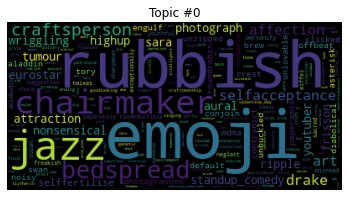

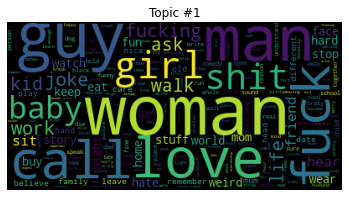

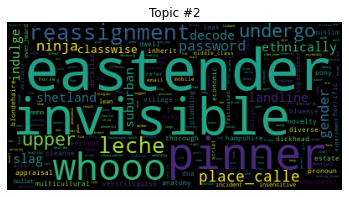

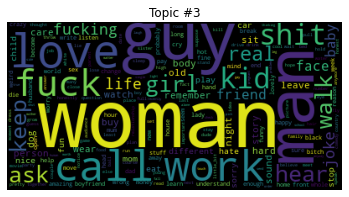

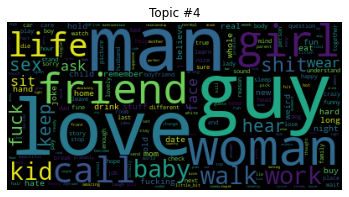

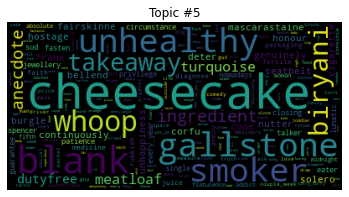

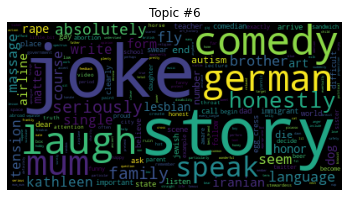

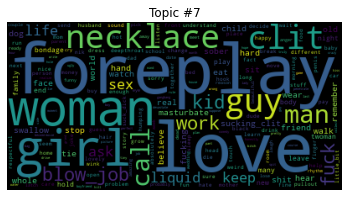

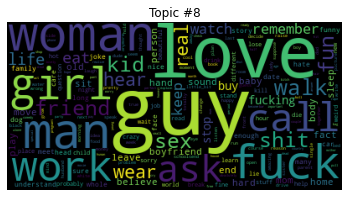

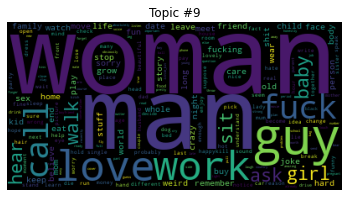

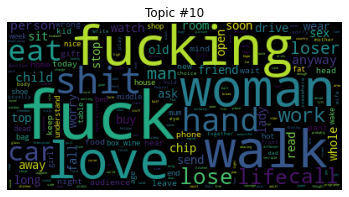

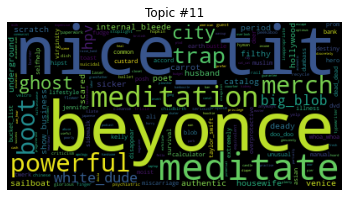

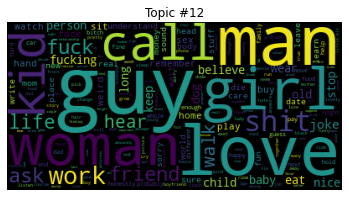

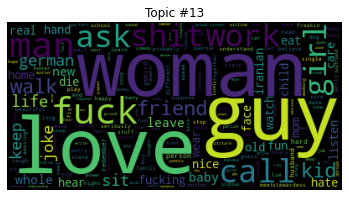

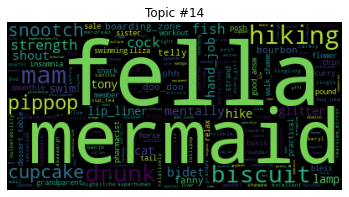

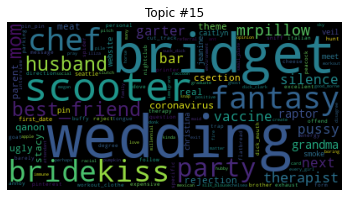

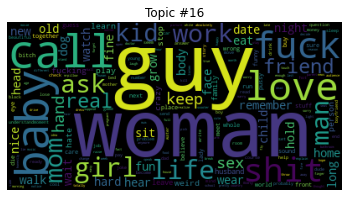

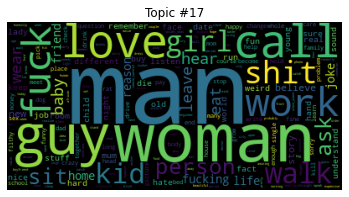

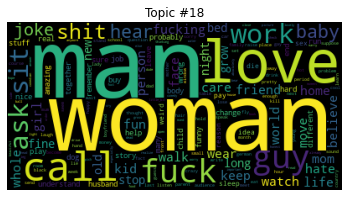

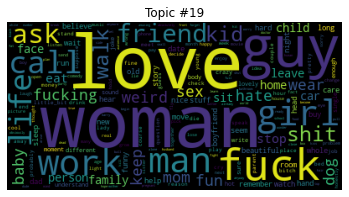

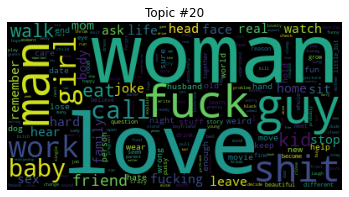

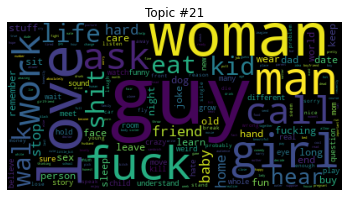

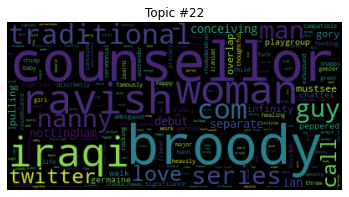

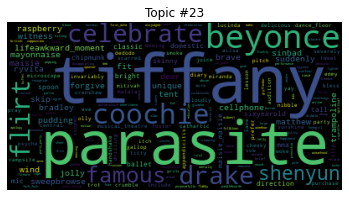

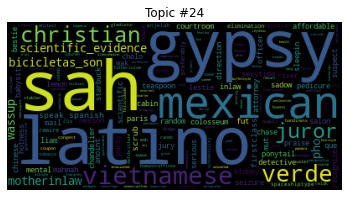

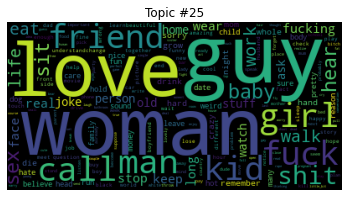

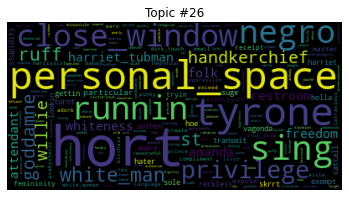

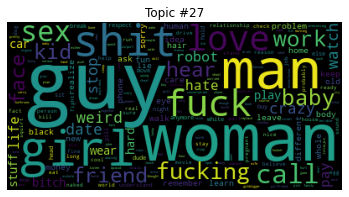

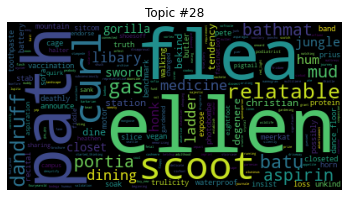

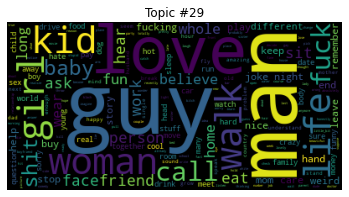

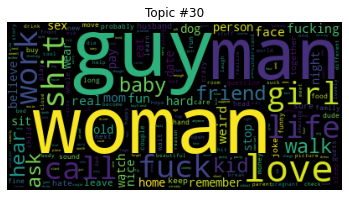

In [102]:
# lda is assumed to be the variable holding the LdaModel object
import matplotlib.pyplot as plt
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()